# Tutorial de Big Data
## Bienvenidos a la clase 3

### Temario:

- Introducción a tweepy, textblob, nltk
- Ejercicio práctico: Analisis de sentimiento de tweets de Joe Biden pre y post elecciones
- Introducción al TP1 parte 2 
- GitHub para entregar los TPs

### Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

In [8]:
import sys
!{sys.executable} -m pip install textblob

In [9]:
import sys
!{sys.executable} -m pip install tweepy

In [10]:
import sys
!{sys.executable} -m pip install timeline

In [11]:
import sys
!{sys.executable} -m pip install matplotlib

In [12]:
#importamos los paquetes a utilizar
import os
import re
import string
from datetime import timezone as tz
from datetime import datetime 
from timeline import timeline

import pandas as pd
import tweepy
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Si alguien quiere trabajar con alguna cuenta en español podrían instalar 
#sentiment_analysis_spanish y utilizarlo en reemplado de TextBlob:
#!{sys.executable} -m pip install sentiment_analysis_spanish
#from sentiment_analysis_spanish import sentiment_analysis
# y pueden crearse una lista de stopwords con las de este link:
# https://github.com/xiamx/node-nltk-stopwords/blob/master/data/stopwords/spanish
# También usaremos string.punctuation. Si trabajan en español podrian agregarle  
# ¿ y ¡ . En ingles incluye lo siguiente: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lgild\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lgild\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Para generar las claves vayan a: 
https://developer.twitter.com/en/portal/dashboard

- Luego a Projects & Apps
- Luego Overview
- Luego + Create App

Crear con Sublime (u otro editor de texto) un archivo llamado `twitter_keys.txt` dentro de la carpeta `Tutorial3` y guardar las 4 claves, una por línea, en el siguiente orden:
- API key
- API key secret
- Access token
- Access token secret

In [13]:
#Creamos variables que contienen nuestas claves de autenticación con la API
with open("twitter_keys.txt") as tw_k: 
    consumer_key = tw_k.readline().strip()
    consumer_secret = tw_k.readline().strip()
    access_key = tw_k.readline().strip()
    access_secret = tw_k.readline().strip()

In [14]:
#Le pasamos nuestras credenciales de twitter a tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

En este link pueden explorar detalles del metodo user_timeline: https://docs.tweepy.org/en/stable/api.html?highlight=user_timeline#tweepy.API.user_timeline

In [15]:
api.user_timeline(screen_name="JoeBiden",tweet_mode="extended")


[Status(_api=<tweepy.api.API object at 0x000002A66E17AD60>, _json={'created_at': 'Fri Aug 26 00:08:06 +0000 2022', 'id': 1562955005228765186, 'id_str': '1562955005228765186', 'full_text': 'Wall Street didn’t build this country. You did. The working people—the middle class—built this nation. And unions built the middle class.\n\nWe won’t let anyone or anything tear America apart.', 'truncated': False, 'display_text_range': [0, 190], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 939091, 'id_str': '939091', 'name': 'Joe Biden', 'screen_name': 'JoeBiden', 'location': 'Washington, DC', 'description': 'Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Offici

In [16]:
def get_all_tweets(screen_name, start_date):
    '''
    Esta funcion recibe el nombre de la persona de quien queremos extraer los 
    tweets y devuelve una lista con todos los tweets y sus datos
    Input: 
      screen_name (str): el nombre de la persona en twitter
      start_date(datetime): fecha desde la que se quieren los tweets
    Output:
      all_tweets (lista): lista con todos los tweets extraidos
    '''
    # Solicitamos los 200 tweets mas recientes (200 es el maximo permitido en count)
    new_tweets = api.user_timeline(screen_name=screen_name, 
                                   tweet_mode="extended", count=200)
    # Creo una lista para almacenar TODOS los tweets y agrego los recién extraidos
    all_tweets = []
    all_tweets.extend(new_tweets)
    # guardo el id del ultimo tweet extraído 
    oldest = all_tweets[-1].id 
    
    # extraigo tweets de a 200 hasta que no haya más
    while len(new_tweets) > 0 and all_tweets[-1].created_at > start_date:
        # Solicito 200 tweets mas y los agrego a la lista de 'all_tweets'
        new_tweets = api.user_timeline(screen_name=screen_name, count=200,
                                       tweet_mode="extended", max_id=oldest-1)
        all_tweets.extend(new_tweets)
        # actualizo el id del ultimo tweet extraído
        oldest = all_tweets[-1].id 
        print("Hasta ahora se han extraido %s tweets" % len(all_tweets))

    return all_tweets


In [17]:
# Extraemos los tweets desde unos días antes de las elecciones del 
# 3 de Noviembre de 2020
date_before_elections = datetime(2020, 10, 16, 0, 0, 0, tzinfo=tz.utc)
all_tweets_biden = get_all_tweets("JoeBiden", date_before_elections)

Hasta ahora se han extraido 400 tweets
Hasta ahora se han extraido 600 tweets
Hasta ahora se han extraido 800 tweets
Hasta ahora se han extraido 1000 tweets
Hasta ahora se han extraido 1200 tweets
Hasta ahora se han extraido 1400 tweets
Hasta ahora se han extraido 1600 tweets
Hasta ahora se han extraido 1799 tweets
Hasta ahora se han extraido 1999 tweets
Hasta ahora se han extraido 2199 tweets


In [18]:
#Veamos la lista con los primeros 5 objetos de tweepy 
all_tweets_biden[:5]


[Status(_api=<tweepy.api.API object at 0x000002A66E17AD60>, _json={'created_at': 'Fri Aug 26 00:08:06 +0000 2022', 'id': 1562955005228765186, 'id_str': '1562955005228765186', 'full_text': 'Wall Street didn’t build this country. You did. The working people—the middle class—built this nation. And unions built the middle class.\n\nWe won’t let anyone or anything tear America apart.', 'truncated': False, 'display_text_range': [0, 190], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 939091, 'id_str': '939091', 'name': 'Joe Biden', 'screen_name': 'JoeBiden', 'location': 'Washington, DC', 'description': 'Husband to @DrBiden, proud father and grandfather. Ready to build back better for all Americans. Offici

In [19]:
# Veamos un solo tweet 
all_tweets_biden[8].full_text

'My plan to address student loan debt is responsible, fair, and focuses the benefit on middle-class and working families. https://t.co/IVp95AfuYW'

In [20]:
def save_tweets_text(all_tweets, csv_file=None):
    '''
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados
    '''
    all_tweets_selection = []
    for tweet in all_tweets:
        one_tweet = [tweet.id_str, tweet.created_at, tweet.full_text, 
                     tweet.retweeted, tweet.favorite_count, 
                     tweet.in_reply_to_screen_name]
        all_tweets_selection.append(one_tweet)
    
    df_all_tweets = pd.DataFrame(all_tweets_selection)
    df_all_tweets.columns = ['id_str', 'created_at', 'text', 'retweeted',
                            'favorite_count', 'in_reply_to_screen_name']
    if csv_file:
        df_all_tweets.to_csv(csv_file, index=False, encoding="utf-8")

    return df_all_tweets

In [21]:
help(save_tweets_text)

Help on function save_tweets_text in module __main__:

save_tweets_text(all_tweets, csv_file=None)
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí 
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados



In [22]:
df_all_tweets = save_tweets_text(all_tweets_biden, "tweets.csv")
df_all_tweets

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name
0,1562955005228765186,2022-08-26 00:08:06+00:00,Wall Street didn’t build this country. You did...,False,17175,None
1,1562953391441334275,2022-08-26 00:01:41+00:00,Every election is a choice. My dad used to say...,False,61591,None
2,1562953001710788611,2022-08-26 00:00:08+00:00,Every single Republican voted against:\n❌ Lowe...,False,19282,None
3,1562951850357583872,2022-08-25 23:55:34+00:00,We had to take on the big drug companies to pa...,False,7017,None
4,1562950578296147968,2022-08-25 23:50:30+00:00,"In 2020, 81 million Americans voted to save ou...",False,51675,None
...,...,...,...,...,...,...
2194,1316808561435967488,2020-10-15 18:30:00+00:00,Nevada — today is the last day to register to ...,False,8217,None
2195,1316801009184722945,2020-10-15 18:00:00+00:00,Donald Trump can lie about the economy all he ...,False,81241,None
2196,1316792201213407232,2020-10-15 17:25:00+00:00,This #SpiritDay — and every day — we must stan...,False,34023,None
2197,1316782889808228352,2020-10-15 16:48:00+00:00,Arizona — ¡la fecha límite para registrarte pa...,False,7332,None


In [23]:
# Emoticons contentos
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Emoticons Tristes
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [24]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # simbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte & simbolos mapas
                           u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [25]:
#mrhod clean_tweets()
def clean_tweets(tweet):
    '''
    Esta función limpia el texto del tweet. Elimina emoticones, palabras vacías,
    links, indicaciones de retweets, etc. Para dejar en el texto solo las
    palabras con mayor contenido.
    Input:
        tweet (str): Texto del tweet original
    Output:
        tweet (str): Texto del tweet limpiado
    '''
    #Elimino caracteres de re-tweets   
    tweet = re.sub(r'^RT .*:', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #Reemplazo caracteres non-ASCII con espacio
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #Saco los links
    tweet = re.sub(r'https.*', '', tweet)
    #Saco los emoji
    tweet = emoji_pattern.sub(r'', tweet)
    
    #Separo los tweets in tokens
    word_tokens = word_tokenize(tweet)
    #Obtengo set de palabras vacias para luego eliminarlas
    stop_words = set(stopwords.words('english'))
    
    #loop por las condiciones
    filtered_tweet = []
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and \
           w not in string.punctuation:
            filtered_tweet.append(w)

    
    return ' '.join(filtered_tweet)

In [26]:
#Este es un tweet sucio:
df_all_tweets.iloc[0]['text']

'Wall Street didn’t build this country. You did. The working people—the middle class—built this nation. And unions built the middle class.\n\nWe won’t let anyone or anything tear America apart.'

In [27]:
#Este es un tweet limpio:
clean_tweets(df_all_tweets.iloc[0]['text'])

'Wall Street build country You The working people middle class built nation And unions built middle class We let anyone anything tear America apart'

In [28]:
def filter_year_and_month(date_tweet, start_time, end_time):
    '''
    Recibe una fecha y devuelve True, si la fecha de la fila esta 
    dentro de los dias especificados como inicio y fin, caso 
    contrario False.
    '''
    dd = pd.to_datetime(date_tweet).date()
    return dd > start_time and dd < end_time
 

In [29]:
def generate_sentiment(texto):
    '''
    Esta funcion limpia el texto y analiza el sentimiento.
    Input:
        texto (str): texto a limpiar y analizar
    Output:
         polarity (float): en el rango [-1.0, 1.0] 
         subjectivity (float): en el rango [0.0, 1.0] 
    '''
    # Limpiamos el texto del tweet
    filtered_tweet = clean_tweets(texto)
    # Calculamos el sentimiento con el metodo TextBlob
    blob = TextBlob(filtered_tweet)
    Sentiment = blob.sentiment

    polarity = Sentiment.polarity
    subjectivity = Sentiment.subjectivity            

    return polarity, subjectivity
    

Polarity: Negative (-1.0) vs. Positive (1.0)

Subjectivity: Objective (0.0) vs. Subjective (1.0)

In [30]:
def add_sentiment(df, start_time, end_time):
    '''
    Esta funcion filtra los tweets entre las fechas de inicio y fin
    indicadas y agrega dos columnas, una de polarity y otra de subjectivity.
    Input:
        df (dataframe): tabla con los tweets en una columa llamada text
        start_time (datetime): fecha del tweet más antiguo a conservar
        end_time (datetime): fecha del tweet más reciente a conservar
    Output:
        df (dataframe): df actualizado con el filtro y nuevas columnas
    '''
    df = df[df.apply(lambda row: filter_year_and_month(row['created_at'], 
                                                start_time, end_time), axis=1)]

    df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
                                            generate_sentiment(row['text']), \
                                            axis=1).tolist(), index=df.index)
    
    return df

In [31]:
start_time = datetime.strptime("2020-10-20", '%Y-%m-%d').date()
end_time = datetime.strptime("2020-11-18", '%Y-%m-%d').date()


In [32]:
tweets_sentimiento = add_sentiment(df_all_tweets, start_time, end_time)
tweets_sentimiento

C:\Users\lgild\AppData\Local\Temp\ipykernel_19648\548788201.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
C:\Users\lgild\AppData\Local\Temp\ipykernel_19648\548788201.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity
1607,1328837822950752259,2020-11-17 23:10:00+00:00,"Today, @KamalaHarris and I met with some of ou...",False,112597,None,0.500000,0.700000
1608,1328790008963227649,2020-11-17 20:00:00+00:00,I’m keeping in my prayers all of our friends a...,False,258215,None,0.266667,0.583333
1609,1328734005404061701,2020-11-17 16:17:28+00:00,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000
1610,1328474177007972354,2020-11-16 23:05:00+00:00,Americans want us to cooperate. They want us t...,False,128998,None,0.500000,0.812500
1611,1328467885279375361,2020-11-16 22:40:00+00:00,"When we build back better, we will do so with ...",False,189249,None,0.250000,0.285714
...,...,...,...,...,...,...,...,...
2096,1318937589097717760,2020-10-21 15:30:00+00:00,Justice is on the ballot.\n\nhttps://t.co/eoxT...,False,22990,None,0.000000,0.000000
2097,1318919971653578752,2020-10-21 14:20:00+00:00,West Virginia — in-person early voting is now ...,False,17446,None,0.050000,0.400000
2098,1318915442153562115,2020-10-21 14:02:00+00:00,Missouri — today is the last day to request a ...,False,13935,None,0.000000,0.066667
2099,1318753877076881408,2020-10-21 03:20:00+00:00,It’s time we see each other as fellow American...,False,108711,None,0.318182,0.550000


In [33]:
tweets_sentimiento.shape

(494, 8)

## Trabajo Practico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el codigo sea facíl de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Lunes 29/8 a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- Tambíen deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/1qaXCveEw3MjEwXQsu2zpqUz34BiaCMR0WapcsQ7jGs0/edit?usp=sharing
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, yo no corregiré sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de habér entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

#### Ejercicio 1: 
Impriman algunos de los tweets más negativos (filtrando por la columna de `polarity`) y su fecha

In [34]:
#Utilizamos el código visto en la tutorial e instalamos los paquetes que nos faltaban. Tomamos eso como base para el web scraping.

df_tw_neg = tweets_sentimiento.query("`polarity` <0") #Generamos un nuevo data frame filtrando las observaciones con polaridad negativa.
df_tw_neg.filter(["text", "polarity", "created_at"]) #Visualizamos el nuevo data frame con las columnas que nos interesan.


,text,polarity,created_at
1622,Today marks five years since the horrific ISIS...,-0.650000,2020-11-13 21:05:00+00:00
1630,"If you’re sick, if you’re struggling, if you’r...",-0.714286,2020-11-11 00:45:00+00:00
1631,"When I’m speaking to foreign leaders, I’m tell...",-0.131250,2020-11-10 23:30:00+00:00
1644,I spent the morning with the co-chairs of my C...,-0.100000,2020-11-09 16:46:50+00:00
1656,It’s time to put away the harsh rhetoric.\n\nT...,-0.200000,2020-11-08 01:50:00+00:00
1675,I spent the afternoon attending briefings on t...,-0.100000,2020-11-05 21:50:33+00:00
1677,"Democracy is sometimes messy, so sometimes it ...",-0.193750,2020-11-05 21:34:16+00:00
1690,"Once this election is finalized and behind us,...",-0.333333,2020-11-04 22:05:00+00:00
1723,RT @KamalaHarris: The 2016 election was lost b...,-0.125000,2020-11-03 18:47:15+00:00
1760,After tonight's horrific terrorist attack in V...,-0.900000,2020-11-03 02:50:00+00:00


#### Ejercicio 2: 
Impriman algunos de los tweets más positivos (filtrando por la columna de `polarity`) y su fecha

In [35]:
df_tw_pos = tweets_sentimiento.query("`polarity` >0") #Generamos un nuevo data frame filtrando las observaciones con polaridad positiva.
df_tw_pos.filter(["text", "polarity", "created_at"]) #Visualizamos el nuevo data frame con las columnas que nos interesan.

,text,polarity,created_at
1607,"Today, @KamalaHarris and I met with some of ou...",0.500000,2020-11-17 23:10:00+00:00
1608,I’m keeping in my prayers all of our friends a...,0.266667,2020-11-17 20:00:00+00:00
1610,Americans want us to cooperate. They want us t...,0.500000,2020-11-16 23:05:00+00:00
1611,"When we build back better, we will do so with ...",0.250000,2020-11-16 22:40:00+00:00
1612,"Right now, Congress should come together and p...",0.246429,2020-11-16 22:15:00+00:00
...,...,...,...
2094,Every day it seems we uncover new horrors perp...,0.136364,2020-10-21 18:36:13+00:00
2095,The Build Back Better Express Tour was about m...,0.300000,2020-10-21 17:02:00+00:00
2097,West Virginia — in-person early voting is now ...,0.050000,2020-10-21 14:20:00+00:00
2099,It’s time we see each other as fellow American...,0.318182,2020-10-21 03:20:00+00:00


###### Ejercicio 3: 
Agreguenle al df llamado `tweets_sentimiento` una nueva columna llamada `positivo` que tenga:
- 1 cuando el tweet tiene polarity > 0, 
- 0 cuando el tweet tiene polarity = 0, 
- -1 cuando el tweet tiene polarity < 0 

In [36]:
positivity = 0 #Generamos una variable para la positividad y le damos valor de base cero.

#Creamos una función que analice la positividad de la polaridad

def generate_positividad(polarity):
    '''
    Esta funcion analiza la polaridad.
    Input:
        polarity (float): valor a analizar
    Output:
         positivity(int): toma los valores 1 cuando la polaridad es > 0, 0 cuando la polaridad es = 0 y -1 cuando la polaridad es < 0. 
    '''
    # Analizamos la polaridad
    if polarity > 0:
        positivity = 1
    elif polarity == 0:
        positivity = 0
    else:
        positivity = -1

    return positivity

In [37]:
#Generamos una función que agregue la columna solicitada en la consigna.

def add_positividad(df):
    '''
    Esta funcion agrega la columna de positivity al data frame.
    Input:
        df (dataframe): tabla con los tweets, que contiene una columna llamada polarity
        positity
    Output:
        df (dataframe): df actualizado con la nueva columan de positividad
    '''

    df[["positivo"]] = pd.DataFrame(df.apply(lambda row: \
                                            generate_positividad(row['polarity']), \
                                            axis=1).tolist(), index=df.index)
    
    return df

tweets_sentimiento = add_positividad(tweets_sentimiento) #Corremos la función con nuestro data frame de interés.
tweets_sentimiento #Visualizamos el nuevo data frame.

#Como en la visualización no veíamos positividad negativa, probamos filtrar alguno para corroborar que funcione bien.
#tweets_sentimiento.query("`positivo` ==-1")

C:\Users\lgild\AppData\Local\Temp\ipykernel_19648\1909837665.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["positivo"]] = pd.DataFrame(df.apply(lambda row: \


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity,positivo
1607,1328837822950752259,2020-11-17 23:10:00+00:00,"Today, @KamalaHarris and I met with some of ou...",False,112597,None,0.500000,0.700000,1
1608,1328790008963227649,2020-11-17 20:00:00+00:00,I’m keeping in my prayers all of our friends a...,False,258215,None,0.266667,0.583333,1
1609,1328734005404061701,2020-11-17 16:17:28+00:00,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000,0
1610,1328474177007972354,2020-11-16 23:05:00+00:00,Americans want us to cooperate. They want us t...,False,128998,None,0.500000,0.812500,1
1611,1328467885279375361,2020-11-16 22:40:00+00:00,"When we build back better, we will do so with ...",False,189249,None,0.250000,0.285714,1
...,...,...,...,...,...,...,...,...,...
2096,1318937589097717760,2020-10-21 15:30:00+00:00,Justice is on the ballot.\n\nhttps://t.co/eoxT...,False,22990,None,0.000000,0.000000,0
2097,1318919971653578752,2020-10-21 14:20:00+00:00,West Virginia — in-person early voting is now ...,False,17446,None,0.050000,0.400000,1
2098,1318915442153562115,2020-10-21 14:02:00+00:00,Missouri — today is the last day to request a ...,False,13935,None,0.000000,0.066667,0
2099,1318753877076881408,2020-10-21 03:20:00+00:00,It’s time we see each other as fellow American...,False,108711,None,0.318182,0.550000,1


#### Ejercicio 4: 
Agrupen los tweets por día y promedien el la polaridad. Luego hagan un gráfico con el sentimiento por día.

In [3]:
import matplotlib.pyplot as plt

In [41]:
# Creamos una nueva variable en nuestro data frame con un formato de fecha (aa-mm-dd), eliminando la hora del tweet
tweets_sentimiento["fecha"] = tweets_sentimiento["created_at"].dt.strftime("%y-%m-%d")
# Visualizamos el nuevo data frame
tweets_sentimiento

C:\Users\lgild\AppData\Local\Temp\ipykernel_19648\1391546382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento["fecha"] = tweets_sentimiento["created_at"].dt.strftime("%y-%m-%d")


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity,positivo,fecha
1607,1328837822950752259,2020-11-17 23:10:00+00:00,"Today, @KamalaHarris and I met with some of ou...",False,112597,None,0.500000,0.700000,1,20-11-17
1608,1328790008963227649,2020-11-17 20:00:00+00:00,I’m keeping in my prayers all of our friends a...,False,258215,None,0.266667,0.583333,1,20-11-17
1609,1328734005404061701,2020-11-17 16:17:28+00:00,RT @Transition46: Our White House senior staff...,False,0,None,0.000000,0.000000,0,20-11-17
1610,1328474177007972354,2020-11-16 23:05:00+00:00,Americans want us to cooperate. They want us t...,False,128998,None,0.500000,0.812500,1,20-11-16
1611,1328467885279375361,2020-11-16 22:40:00+00:00,"When we build back better, we will do so with ...",False,189249,None,0.250000,0.285714,1,20-11-16
...,...,...,...,...,...,...,...,...,...,...
2096,1318937589097717760,2020-10-21 15:30:00+00:00,Justice is on the ballot.\n\nhttps://t.co/eoxT...,False,22990,None,0.000000,0.000000,0,20-10-21
2097,1318919971653578752,2020-10-21 14:20:00+00:00,West Virginia — in-person early voting is now ...,False,17446,None,0.050000,0.400000,1,20-10-21
2098,1318915442153562115,2020-10-21 14:02:00+00:00,Missouri — today is the last day to request a ...,False,13935,None,0.000000,0.066667,0,20-10-21
2099,1318753877076881408,2020-10-21 03:20:00+00:00,It’s time we see each other as fellow American...,False,108711,None,0.318182,0.550000,1,20-10-21


In [44]:
# Agrupamos los tweets por fecha y promediamos su polaridad
tweets_dia_agg = tweets_sentimiento.groupby(by = ["fecha"]).agg({"polarity":"mean"})
# Reseteamos el índice para que fecha no sea tomado como tal
tweets_dia_agg . reset_index ( inplace = True )
# Visualizamos el nuevo data frame
tweets_dia_agg

,fecha,polarity
0,20-10-21,0.122063
1,20-10-22,0.132929
2,20-10-23,0.122758
3,20-10-24,0.035287
4,20-10-25,0.081356
5,20-10-26,0.118350
6,20-10-27,0.058696
7,20-10-28,0.077308
8,20-10-29,0.120751
9,20-10-30,0.077652


In [52]:
# Definimos los vectores de datos para el gráfico
y1 = tweets_dia_agg["polarity"]
x1 = tweets_dia_agg["fecha"]

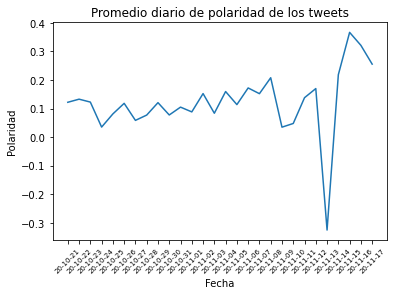

In [66]:
# Creamos el gráfico

plt.plot(x1, y1)

#Modificamos las labels
plt.xlabel("Fecha")
plt.ylabel("Polaridad")
plt.title("Promedio diario de polaridad de los tweets")
plt.xticks(rotation =45, size=7)

plt.show() #esto es  necesario  para  visualizar

#### Repaso del análisis de sentimiento: 
Por último, los invito a que exploren el análisis de sentimiento de forma teórica y práctica:
- Revisen la documentación de `TextBlob` y del método `sentiment` https://textblob.readthedocs.io/en/dev/ 
- Prueben en la practica el resultado que arroja para determinadas frases (les dejo unos ejemplos, pero pueden probar los que quieran)


In [67]:
testimonial = TextBlob("Big Data is so much fun!")
testimonial.sentiment

Sentiment(polarity=0.1875, subjectivity=0.15000000000000002)

In [70]:
testimonial2 = TextBlob("Big Data is horrible!")
testimonial2.sentiment

Sentiment(polarity=-0.5, subjectivity=0.55)

#### Análisis de lo que probamos: 
Tomando como ejemplo los comandos que se presentan en la página, probamos con dos frases que tuvieran sentimientos opuestos. Podemos ver que en el primer caso la polaridad efectivamente es positiva, mientras que en el segundo es más negativa. Con respecto a la subjetividad, vemos que también varía.